<a href="https://colab.research.google.com/github/ShailendraSChauhan/DP100/blob/main/Diabetes_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diabetes Binary Classification**
- **Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.
- **DataSet** - https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv

In [85]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
import pandas as pd

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes= pd.read_csv("diabetes.csv")
diabetes.head()

--2024-02-04 03:13:26--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>] 758.22K  --.-KB/s    in 0.05s   

2024-02-04 03:13:26 (16.1 MB/s) - ‘diabetes.csv.1’ saved [776415/776415]



,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


**Explore the data set - EDA**

In [3]:
diabetes.shape #rows , columns

(15000, 10)

In [4]:
diabetes.head().T # .T transpose the rows into columns and columns into rows

,0,1,2,3,4
PatientID,1.354778e+06,1.147438e+06,1.640031e+06,1.883350e+06,1.424119e+06
Pregnancies,0.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,1.000000e+00
PlasmaGlucose,1.710000e+02,9.200000e+01,1.150000e+02,1.030000e+02,8.500000e+01
DiastolicBloodPressure,8.000000e+01,9.300000e+01,4.700000e+01,7.800000e+01,5.900000e+01
TricepsThickness,3.400000e+01,4.700000e+01,5.200000e+01,2.500000e+01,2.700000e+01
SerumInsulin,2.300000e+01,3.600000e+01,3.500000e+01,3.040000e+02,3.500000e+01
BMI,4.350973e+01,2.124058e+01,4.151152e+01,2.958219e+01,4.260454e+01
DiabetesPedigree,1.213191e+00,1.583650e-01,7.901857e-02,1.282870e+00,5.495419e-01
Age,2.100000e+01,2.300000e+01,2.300000e+01,4.300000e+01,2.200000e+01
Diabetic,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [5]:
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [8]:
diabetes.info()
diabetes.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [42]:
# Differentiate the features and target
features = diabetes.iloc[:, 1:9]
label = "Diabetic"

X, y = features.values, diabetes[label].values

for n in range(0,4):
  print("Patient :", str(n+1),"------------", "\n Features :", list(X[n]), "\n Label: ", y[n])


Patient : 1 ------------ 
 Features : [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label:  0
Patient : 2 ------------ 
 Features : [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label:  0
Patient : 3 ------------ 
 Features : [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label:  0
Patient : 4 ------------ 
 Features : [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label:  1


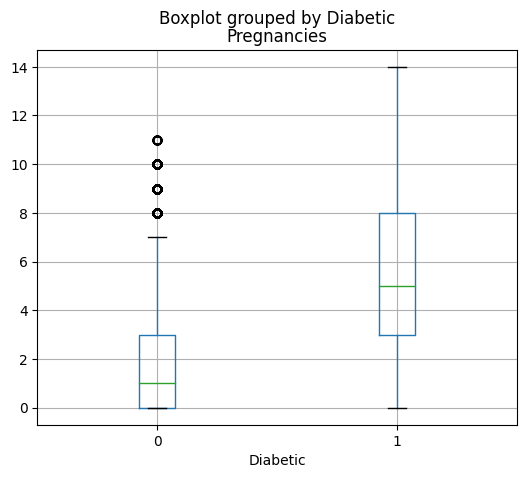

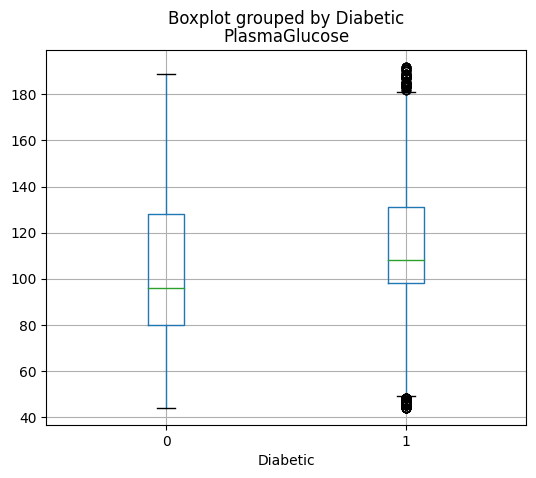

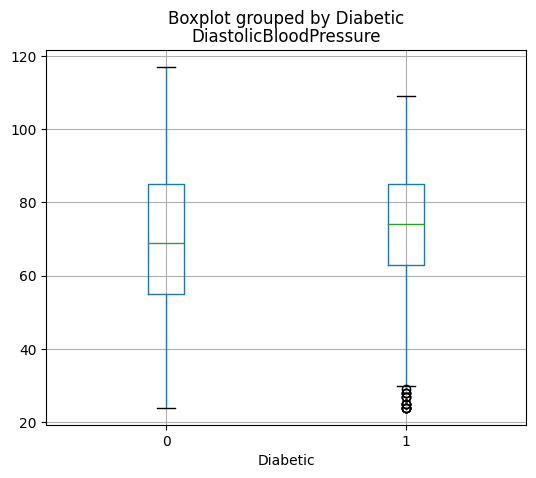

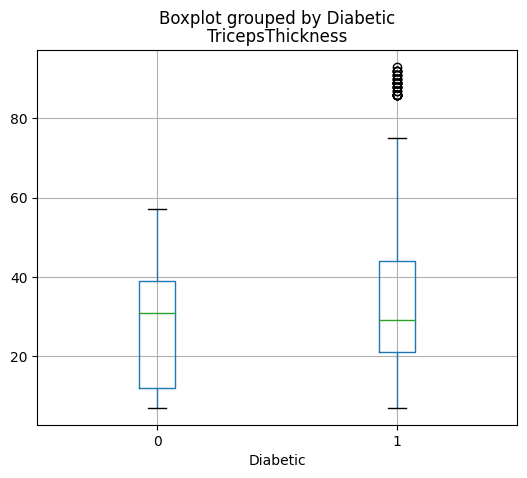

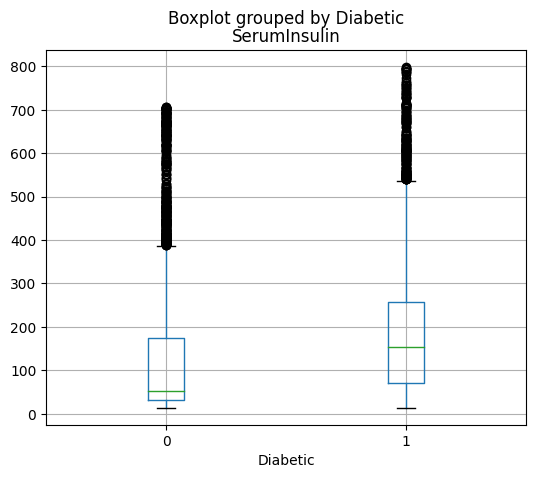

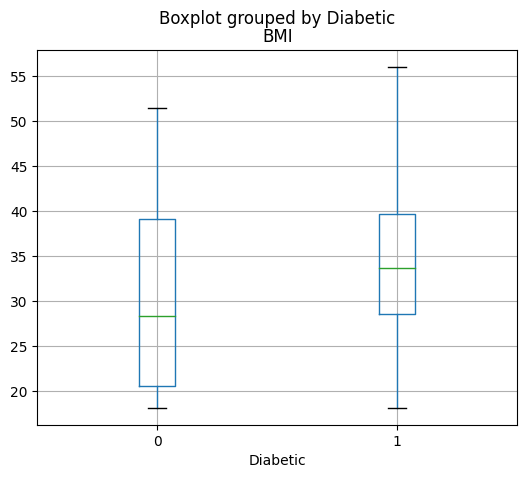

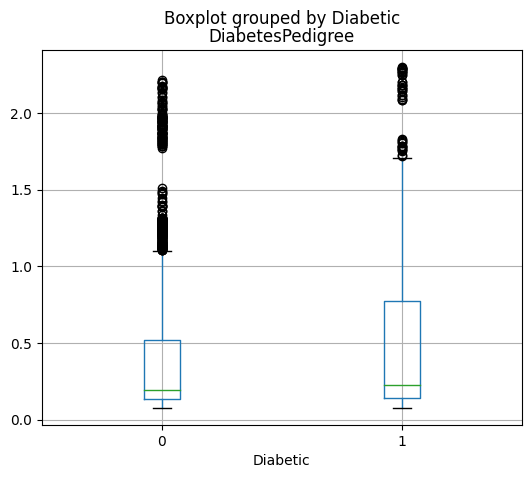

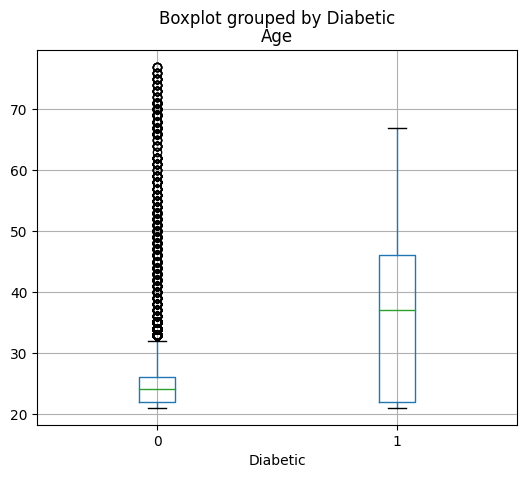

In [51]:
#Plot the feature distribution for each label

for col in features.columns:
  diabetes.boxplot(column=col, by="Diabetic", figsize=(6,5))

In [55]:
#Split the data into train an test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)

print('Training : %d\n Test: %d' %(X_train.shape[0], X_test.shape[0]))

Training : 10500
 Test: 4500


In [56]:
#Train the model
from sklearn.linear_model import LogisticRegression

#Regularization Rate
reg = 0.001

#Train the model
model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)
model

LogisticRegression(C=1000.0, solver='liblinear')

In [59]:
#Make Predictions
predictions = model.predict(X_test)

print("Prediction :", predictions)
print("Actual :", y_test)

Prediction : [0 0 0 ... 0 0 0]
Actual : [0 1 0 ... 0 0 0]


In [64]:
#Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print("Accuracy score is : %.2f" %accuracy)

Accuracy score is : 0.79


Using the **Classification Report** for evaluation

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score

print(classification_report(y_test, predictions))
print("Precision Score :", precision_score(y_test, predictions))
print("Recall Score :", recall_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3005
           1       0.73      0.57      0.64      1495

    accuracy                           0.79      4500
   macro avg       0.77      0.73      0.74      4500
weighted avg       0.78      0.79      0.78      4500

Precision Score : 0.7278156996587031
Recall Score : 0.5705685618729097


Use the **Confusion Matrix** for evaluation

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
print(cm)

[[2686  319]
 [ 642  853]]


Plot the graph using the **proability** of the prediction

In [71]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.6250985  0.3749015 ]
 [0.93242187 0.06757813]
 [0.92325528 0.07674472]
 ...
 [0.75427653 0.24572347]
 [0.7034751  0.2965249 ]
 [0.81736208 0.18263792]]


Plot the **ROC-AUC** curve

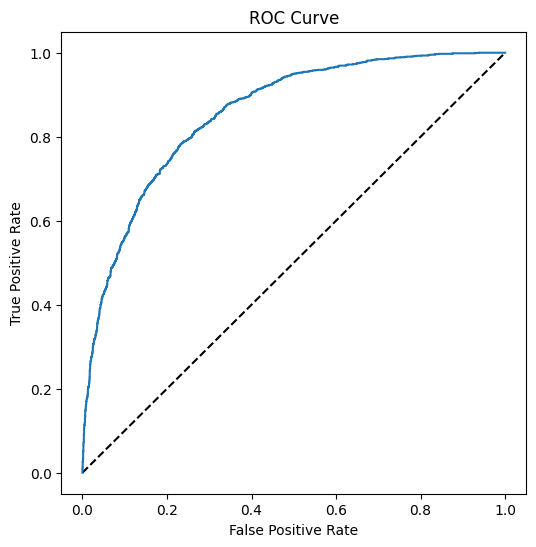

AUC : 0.8560214581049421


In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
#Plot ROC Curve
fig = plt.figure(figsize= (6,6))

#Plot the diagonal line of 50%
plt.plot([0,1], [0,1], "k--") # use k-- more -- will give error

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

auc = roc_auc_score(y_test, y_scores[:,1])
print("AUC :", auc )

Try by using **Preprocessing** - Scaler and later **Pipeline**

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregression',
                 LogisticRegression(C=1000.0, solver='liblinear'))])
Prediction : [0 0 0 ... 0 0 0]
Actual : [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3005
           1       0.79      0.71      0.75      1495

    accuracy                           0.84

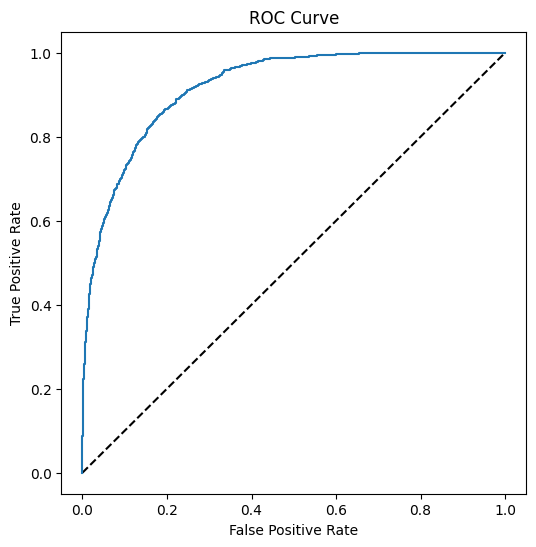

AUC : 0.9197124079711073


In [79]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Normalizing the numeric features
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Normalizing the cateforical fetaures
cat_features = [7]
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features ),
        ('cat', cat_transformer, cat_features)    ])

#Create the pipeline
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('logregression', LogisticRegression(C=1/reg, solver='liblinear' ))])

#Train the model
model = pipeline.fit(X_train, (y_train))
print(model)

#Make Predictions
predictions = model.predict(X_test)

print("Prediction :", predictions)
print("Actual :", y_test)

#Evaluation Matrix
print(classification_report(y_test, predictions))
print("Precision Score :", precision_score(y_test, predictions))
print("Recall Score :", recall_score(y_test, predictions))

y_scores = model.predict_proba(X_test)
print(y_scores)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
#Plot ROC Curve
fig = plt.figure(figsize= (6,6))

#Plot the diagonal line of 50%
plt.plot([0,1], [0,1], "k--") # use k-- more -- will give error

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

auc = roc_auc_score(y_test, y_scores[:,1])
print("AUC :", auc )

Use the **RandomForest model**

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])
Confusion Matrix:
 [[2896  109]
 [ 169 1326]] 

Accuracy: 0.9382222222222222
Overall Precision: 0.9240418118466899
Overall Recall: 0.8869565217391304
AUC: 0.984032298454638


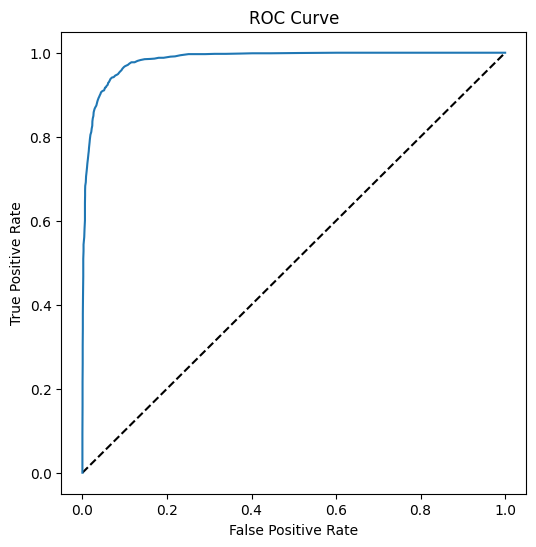

In [82]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('logregressor', RandomForestClassifier(n_estimators=100))])

#Train the new model
model = pipeline.fit(X_train, (y_train))
print(model)

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Save the model** for new data using **joblib**

In [83]:
import joblib

#Save the using as pickle file
filename = '/.diabetes_model.pkl'
joblib.dump(model, filename)

['/.diabetes_model.pkl']

In [92]:
#Check the above model on new data
model = joblib.load(filename)

#Enter parameter to check
X_check = np.array([[2,160,80,24,21,23.9,1.4,29]])
print("New Sample :", list(X_check[0]))

#Make Prediction
pred = model.predict(X_check)
print("Prediction made is :", pred[0])

New Sample : [2.0, 160.0, 80.0, 24.0, 21.0, 23.9, 1.4, 29.0]
Prediction made is : 1
